['Albania' 'Austria' 'Belgium' 'Bulgaria' 'Bosnia and Herzegovina'
 'Belarus' 'Switzerland' 'Czechia' 'Germany' 'Spain' 'Finland' 'France'
 'United Kingdom' 'Greece' 'Croatia' 'Hungary' 'Ireland' 'Iceland' 'Italy'
 'Lithuania' 'Luxembourg' 'Moldova, Republic of' 'North Macedonia'
 'Netherlands' 'Poland' 'Portugal' 'Romania' 'Russian Federation' 'Serbia'
 'Slovakia' 'Slovenia' 'Sweden' 'Ukraine' 'Kosovo']
308.76099999999997
           sub_region   latitude  longitude  capacity
8     Southern Europe  41.836770  19.633450     0.500
9     Southern Europe  41.503079  19.743606     1.330
10    Southern Europe  41.549091  19.725338     1.400
11    Southern Europe  41.120103  20.045136     0.300
76     Western Europe  47.908647  14.116847     0.550
...               ...        ...        ...       ...
2870   Eastern Europe  48.524961  34.583111     3.000
2872   Eastern Europe  47.834325  38.479859     2.500
2874   Eastern Europe  48.730626  37.544124     0.725
2875   Eastern Europe  44.773711 

C:\Users\rapha\AppData\Local\Temp\ipykernel_756\384076235.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_dataset = gpd.datasets.get_path('naturalearth_lowres')


(25.0, 70.0)

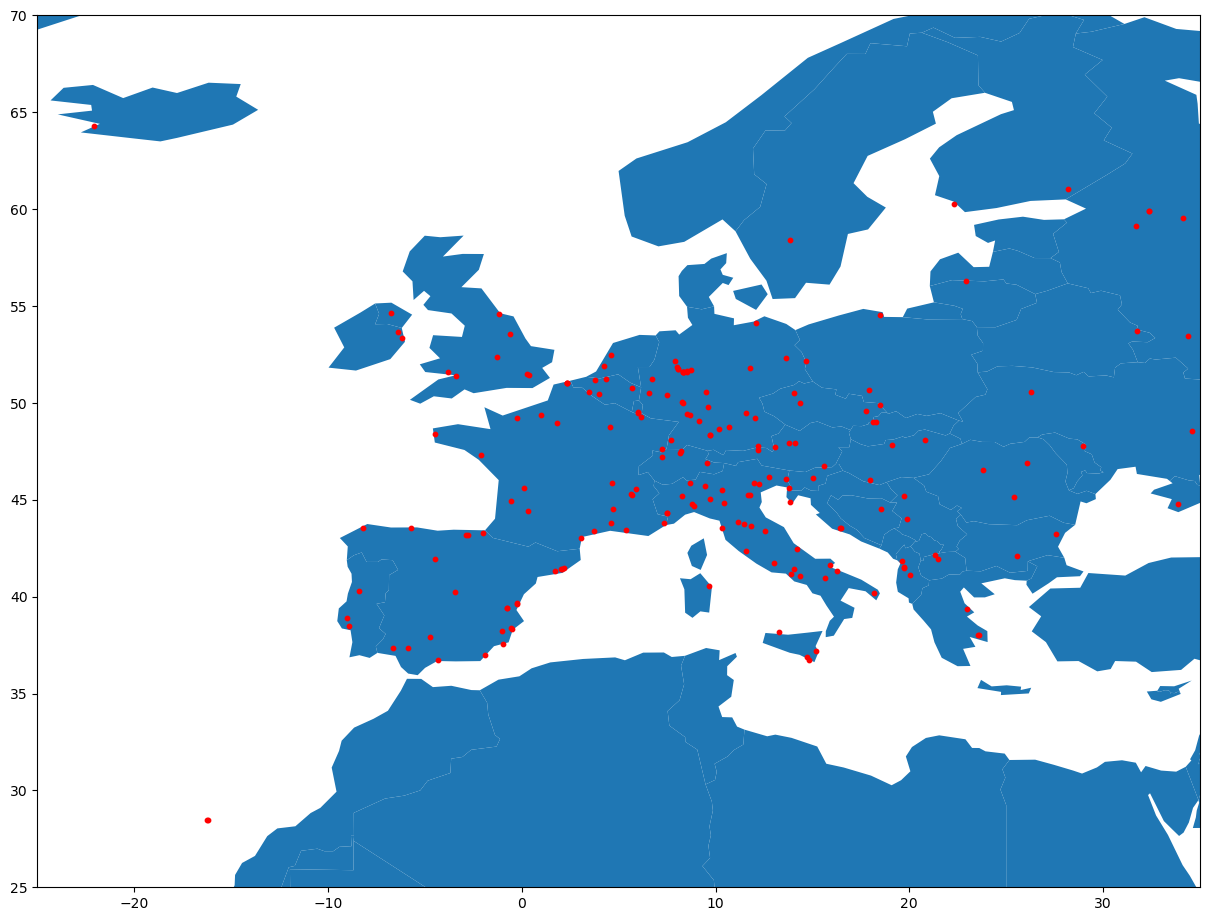

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


cement_assets_orig = pd.read_csv('doi_10_5061_dryad_6t1g1jx4f__v20231004/SFI-Global-Cement-Database-assets.csv')
cement_assets = cement_assets_orig[cement_assets_orig['status'] == 'Operating']
cement_assets = cement_assets[cement_assets['plant_type'] == 'Grinding']
cement_assets = cement_assets[cement_assets['region'] == 'Europe']
#cement_assets = cement_assets[cement_assets['latitude'] > 35]
#cement_assets = cement_assets[cement_assets['longitude'] < 25]
# cement_assets = cement_assets[cement_assets['country'] != 'Russian Federation']
#cement_assets = cement_assets[cement_assets['country'] != 'Ukraine']
#ement_assets = cement_assets[cement_assets['country'] != 'Belarus']
print(cement_assets['country'].unique())
capacity_sum = cement_assets['capacity'].sum()
print(capacity_sum)
print(cement_assets[['sub_region', 'latitude', 'longitude', 'capacity']])
world_dataset = gpd.datasets.get_path('naturalearth_lowres')
print(world_dataset)
world = gpd.read_file(world_dataset)
world_rivers = gpd.read_file('ne_110m_rivers_lake_centerlines/ne_110m_rivers_lake_centerlines.shp')
world_coastlines = gpd.read_file('ne_110m_coastline/ne_110m_coastline.shp')
world_countries = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

plt, ax = plt.subplots(figsize=(15, 15))

#world_rivers.plot(ax=ax)
#world_coastlines.plot(ax=ax)
#world.query('continent == "Europe"').plot(ax=ax)
world_countries.plot(ax=ax)
long = cement_assets['longitude'].values
lat = cement_assets['latitude'].values
geometry = [Point(xy) for xy in zip(long, lat)]
geo_df = gpd.GeoDataFrame(geometry=geometry)
geo_df.plot(ax=ax, color='red', markersize=10)
ax.set_xlim(-25, 35)
ax.set_ylim(25, 70)


In [9]:
import numpy as np

def calc_theoretical_uptake(coastline_length, strip_width, tCO2_per_km2_per_year):
    uptake = coastline_length * strip_width * tCO2_per_km2_per_year
    CaO_needed = uptake / 44.01 * 56.078 / 0.7
    CaOH_2_needed = uptake / 44.01 * 74.078 / 0.7
    return uptake, CaO_needed, CaOH_2_needed

areas = np.asarray(["Meditteranean", "South Africa", "NE Africa", "NW Australia", "USA West Coast", "West Japan", "World"])
areas_coastline = np.asarray([3e3, 2.798e3, 3e3, 2.5e3, 2.1e3, 1.1e3, 200e3])
areas_strip_width = np.asarray([500, 600, 600, 600, 600, 600, 600])
areas_tCO2_per_km2_per_year = np.asarray([110, 290, 290, 200, 140, 180, 200])

for i in range(np.size(areas)):
    uptake, CaO_needed, CaOH_2_needed = calc_theoretical_uptake(areas_coastline[i], areas_strip_width[i], areas_tCO2_per_km2_per_year[i])
    print("Area: ", areas[i], ", uptake: ", uptake / 1e6, "MtCO2/year, CaO needed: ", CaO_needed / 1e6, "Mt/year, CaOH2 needed: ", CaOH_2_needed / 1e6, "Mt/year")

Area:  Meditteranean , uptake:  165.0 MtCO2/year, CaO needed:  300.3495958710683 Mt/year, CaOH2 needed:  396.75625669490705 Mt/year
Area:  South Africa , uptake:  486.852 MtCO2/year, CaO needed:  886.2169784789172 Mt/year, CaOH2 needed:  1170.6762247541146 Mt/year
Area:  NE Africa , uptake:  522.0 MtCO2/year, CaO needed:  950.1969033011978 Mt/year, CaOH2 needed:  1255.1925211802513 Mt/year
Area:  NW Australia , uptake:  300.0 MtCO2/year, CaO needed:  546.0901743110333 Mt/year, CaOH2 needed:  721.3750121725583 Mt/year
Area:  USA West Coast , uptake:  176.4 MtCO2/year, CaO needed:  321.10102249488756 Mt/year, CaOH2 needed:  424.1685071574642 Mt/year
Area:  West Japan , uptake:  118.8 MtCO2/year, CaO needed:  216.2517090271692 Mt/year, CaOH2 needed:  285.66450482033304 Mt/year
Area:  World , uptake:  24000.0 MtCO2/year, CaO needed:  43687.21394488267 Mt/year, CaOH2 needed:  57710.000973804665 Mt/year


Index(['Entity', 'Code', 'Year', 'Bioenergy levelized cost of energy',
       'Geothermal levelized cost of energy',
       'Offshore wind levelized cost of energy',
       'Solar photovoltaic levelized cost of energy',
       'Concentrated solar power levelized cost of energy',
       'Hydropower levelized cost of energy',
       'Onshore wind levelized cost of energy'],
      dtype='object')
Asia 5970.382799999999
Africa 361.743
Europe 638.465
Americas 488.91679999999997
Oceania 26.915
[['China', 4032.145], ['India', 668.4399999999999], ['Vietnam', 140.85500000000002], ['Russian Federation', 136.961], ['United States of America', 133.462], ['Korea, Republic of', 121.887], ['Indonesia', 118.5], ['Turkey', 113.0736], ['Brazil', 107.14], ['Iran (Islamic Republic of)', 88.91100000000002], ['Saudi Arabia', 79.7], ['Germany', 77.14999999999998], ['Egypt', 76.102], ['Italy', 73.21], ['Japan', 71.55000000000001], ['Mexico', 68.4], ['Pakistan', 64.8292], ['Spain', 64.786], ['France', 62.36000

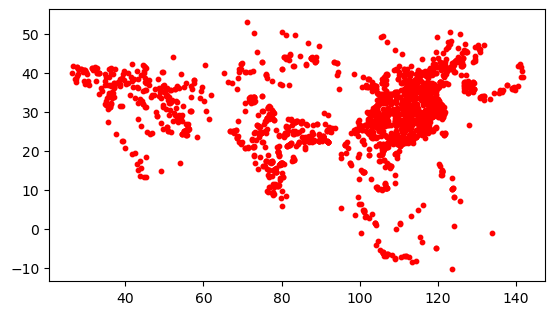

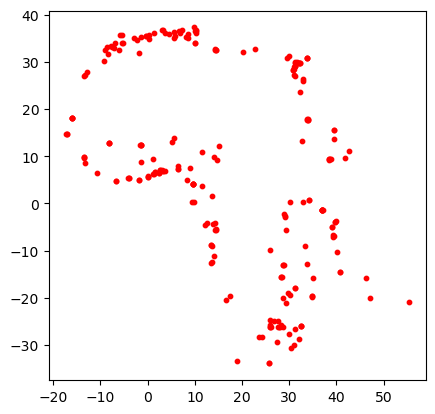

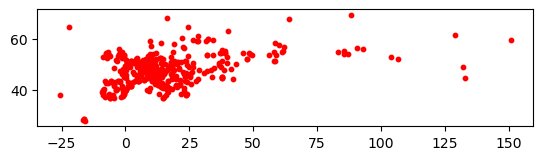

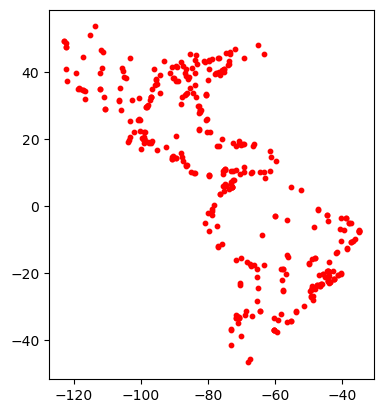

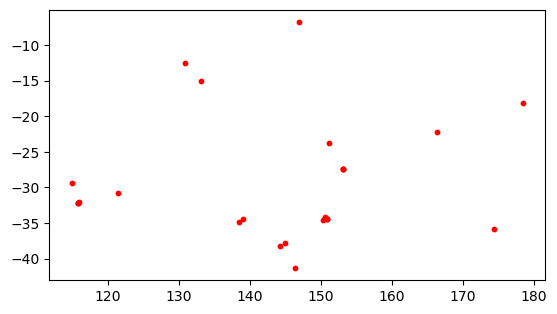

In [25]:
lcoe = pd.read_csv('levelized-cost-of-energy.csv')
lcoe = lcoe[lcoe['Year'] == 2022]
print(lcoe.columns)

regions = cement_assets_orig['region'].unique()

for region in regions:
    ca_region = cement_assets_orig[cement_assets_orig['region'] == region]
    capacity = ca_region.capacity.sum()
    print(region, capacity)
    long_r = ca_region['longitude'].values
    lat_r = ca_region['latitude'].values
    geometry_r = [Point(xy) for xy in zip(long_r, lat_r)]
    geo_df_r = gpd.GeoDataFrame(geometry=geometry_r)
    geo_df_r.plot(color='red', markersize=10)

countries = cement_assets_orig['country'].unique()
country_caps = []

for country in countries:
    ca_country = cement_assets_orig[cement_assets_orig['country'] == country]
    capacity = ca_country.capacity.sum()
    country_caps.append([country, capacity])
    long_c = ca_country['longitude'].values
    lat_c = ca_country['latitude'].values
    geometry_c = [Point(xy) for xy in zip(long_c, lat_c)]
    geo_df_c = gpd.GeoDataFrame(geometry=geometry_c)
    #geo_df_c.plot(color='red', markersize=10)

country_caps.sort(key=lambda x: x[1], reverse=True)
print(country_caps)

ca_europe = cement_assets_orig[cement_assets_orig['region'] == 'Europe'].capacity.sum()

[['Asia', 69.75939], ['Africa', 75.07166], ['Europe', 42.158325], ['North America', 55.18746], ['South America', 22.924393], ['Oceania', 64.27069]]
[['Asia', 1546.93], ['Africa', 93.73], ['Europe', 165.43], ['Americas', 126.68], ['Oceania', 6.98]]
[['Asia', False, False, 917.53], ['Asia', True, False, 751.3], ['Asia', True, True, 563.48], ['Africa', False, False, 55.6], ['Africa', True, False, 47.3], ['Africa', True, True, 35.47], ['Europe', False, False, 98.13], ['Europe', True, False, 64.12], ['Europe', True, True, 48.09], ['Americas', False, False, 75.14], ['Americas', True, False, 47.71], ['Americas', True, True, 35.78], ['Oceania', False, False, 4.15], ['Oceania', True, False, 2.23], ['Oceania', True, True, 1.68]]
[['Asia', False, False, 1.1, 0.060251942993539774, 0.10143711002545655, 93.20553817499649], ['Asia', True, False, 1.1, 0.16770994044655962, 0.2823479349581219, 259.4355381749965], ['Asia', True, True, 1.1, 0.28912461337940076, 0.48675550963689934, 447.25553817499645], ['

C:\Users\rapha\AppData\Local\Temp\ipykernel_10516\3601577232.py:99: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  print(ratios[non_renew_non_ccs, 6].astype(np.number))
C:\Users\rapha\AppData\Local\Temp\ipykernel_10516\3601577232.py:102: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  'No renewables, no CCS': ratios[non_renew_non_ccs, 6].astype(np.number),
C:\Users\rapha\AppData\Local\Temp\ipykernel_10516\3601577232.py:103: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  'Renewables, no CCS': ratios[renew_non_ccs, 6].astype(np.number),
C:\Users\rapha\AppData\Local\Temp\ipykernel_10516\3601577232.py:104: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is d

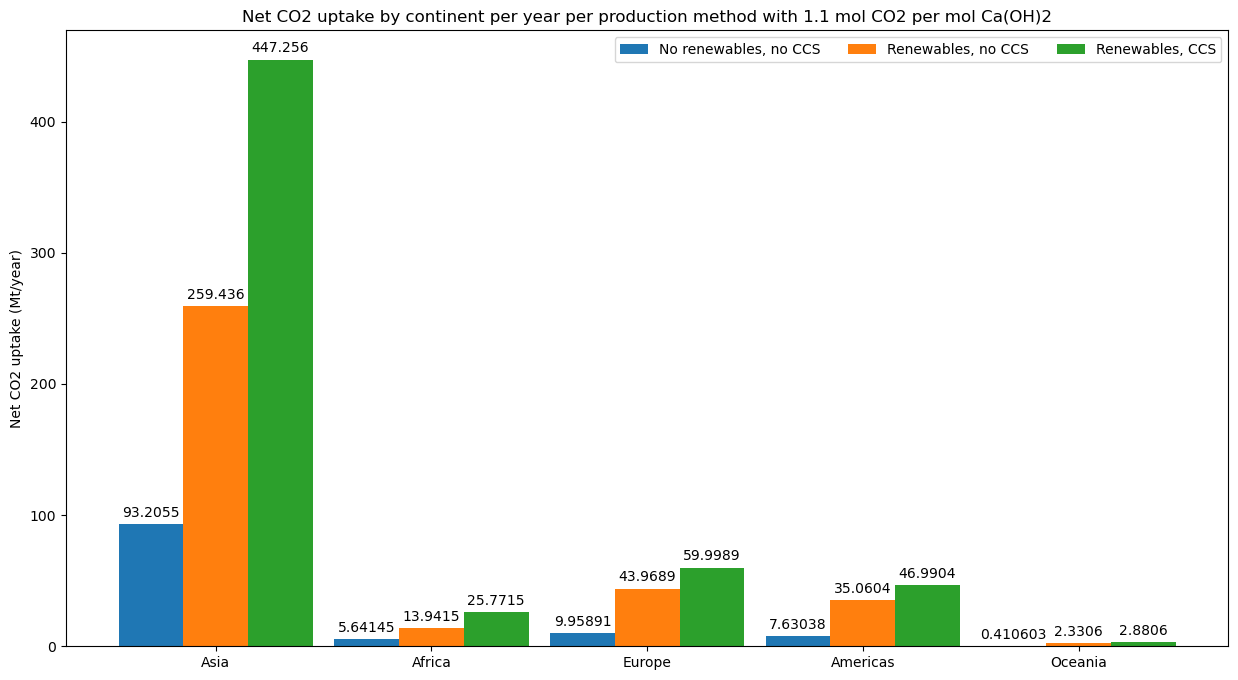

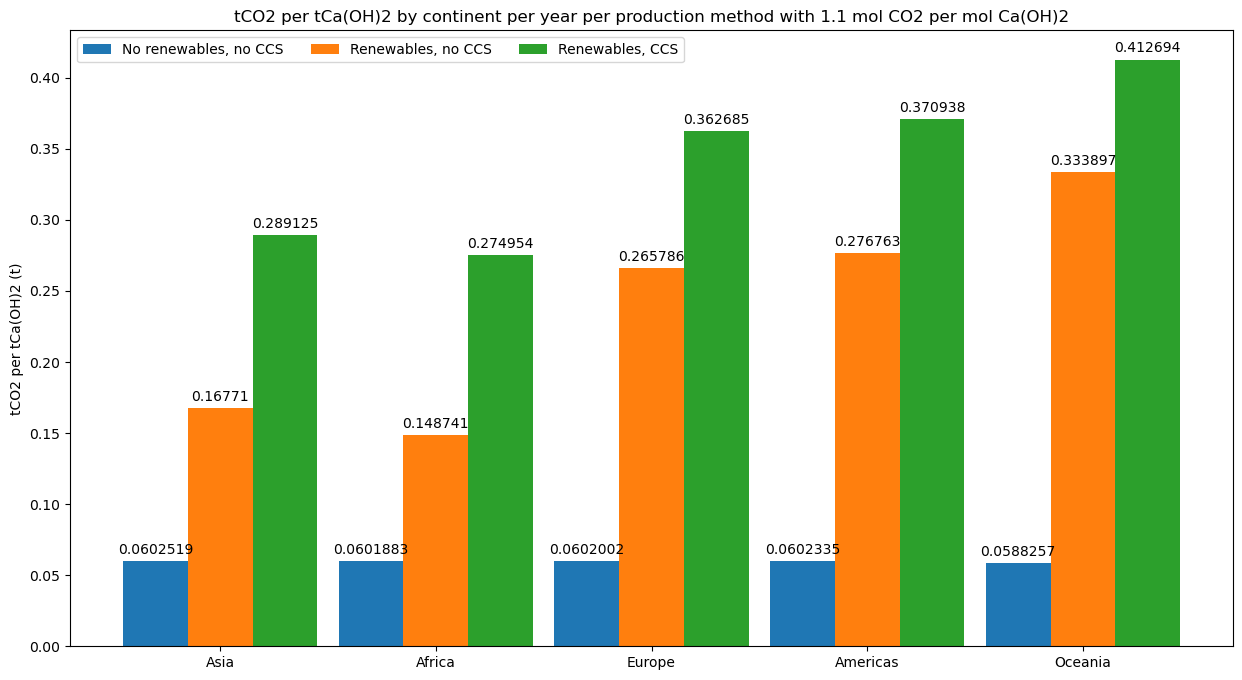

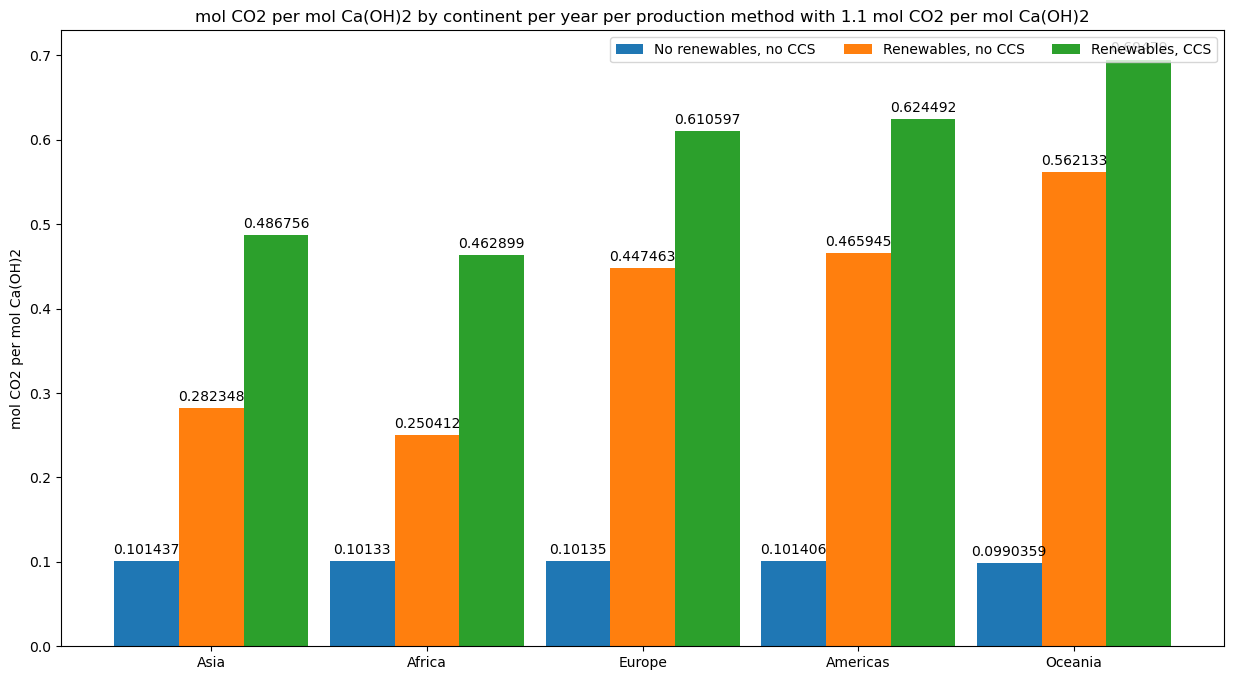

In [6]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# First we calculate the share of electricity from fossil fuels for each continent
cement_assets_orig = pd.read_csv('doi_10_5061_dryad_6t1g1jx4f__v20231004/SFI-Global-Cement-Database-assets.csv')
share_renew = pd.read_csv('share-electricity-fossil-fuels (1).csv')
avg_share_renew_by_region = []

def get_share_renew(region, year):
    share_renew_region = share_renew[share_renew['Entity'] == region]
    return share_renew_region[share_renew_region['Year'] == year]

regions = ['Asia', 'Africa', 'Europe', 'North America', 'South America', 'Oceania']
years = [2022, 2022, 2022, 2022, 2022, 2021]

for i in range(len(regions)):
    share_renew_region = get_share_renew(regions[i], years[i])
    avg_share_renew_by_region.append([regions[i], share_renew_region['Electricity'].values[0]])

print(avg_share_renew_by_region)

# Then we calculate the potential hydrated lime production in each continent
region_hydrated_lime_production_potentials = []
regions = ['Asia', 'Africa', 'Europe', 'Americas', 'Oceania']

def calculate_hydrated_lime_production(percentage_upscale, region):
    ca_region = cement_assets_orig[cement_assets_orig['region'] == region]
    capacity = ca_region.capacity.sum()
    hydrated_lime_production = capacity * percentage_upscale / 100.0869 * 74.093 * 0.7
    hydrated_lime_production = math.ceil(hydrated_lime_production * 100) / 100
    return hydrated_lime_production

for region in regions:
    ca_region = cement_assets_orig[cement_assets_orig['region'] == region]
    capacity = ca_region.capacity.sum()
    hydrated_lime_production = calculate_hydrated_lime_production(0.5, region)
    region_hydrated_lime_production_potentials.append([region, hydrated_lime_production])

print(region_hydrated_lime_production_potentials)

# Then we calculate CO2 emissions for each continent's production of hydrated lime

def calculate_co2_emissions(region, capacity, use_sustainable_process, use_ccs):
    capacity = capacity * 1.321
    if (not use_sustainable_process):
        emissions = capacity * 0.449
        return math.ceil(emissions * 100) / 100
    else:
        share_renew_region = 0
        if (region == 'Americas'):
            share_renew_region = (avg_share_renew_by_region[3][1] + avg_share_renew_by_region[4][1]) / 2
        else:
            share_renew_region = avg_share_renew_by_region[regions.index(region)][1]
        emissions = (1 - (share_renew_region / 100)) * 0.180 * capacity + share_renew_region / 100 * 0.449 * capacity
        if (use_ccs):
            emissions = emissions * 0.75
        return math.ceil(emissions * 100) / 100

emissions_per_region = []
use_sustainable = [[False, False], [True, False], [True, True]]

for i in range(len(region_hydrated_lime_production_potentials)):
    for option in use_sustainable:
        emissions_per_region.append([region_hydrated_lime_production_potentials[i][0], option[0], option[1], calculate_co2_emissions(region_hydrated_lime_production_potentials[i][0], region_hydrated_lime_production_potentials[i][1], option[0], option[1])])

print(emissions_per_region)

# Then we calculate the molar effeciency for each of these, taking production emissions into account

molar_ratios_orig = [1.1]

def calculate_net_mol_ratio(mol_ratio, emissions, capacity):
    #print(mol_ratio, emissions, capacity)
    uptake_CO2_total = capacity / 74.093 * mol_ratio * 44.01 - emissions
    #print(uptake_CO2_total)
    uptake_CO2_per_ton = uptake_CO2_total / capacity
    uptake_CO2_per_mol = uptake_CO2_total / 44.01 / (capacity / 74.093)

    return uptake_CO2_per_ton, uptake_CO2_per_mol, uptake_CO2_total

ratios = []

for i in range(len(emissions_per_region)):
    for ratio in molar_ratios_orig:
        mol_ratio = calculate_net_mol_ratio(ratio, emissions_per_region[i][3], region_hydrated_lime_production_potentials[regions.index(emissions_per_region[i][0])][1])
        ratios.append([emissions_per_region[i][0], emissions_per_region[i][1], emissions_per_region[i][2], ratio, mol_ratio[0], mol_ratio[1], mol_ratio[2]])

print(ratios)

ratios = np.asarray(ratios)
bar_regions = np.asarray(regions)
non_renew_non_ccs = np.logical_and(ratios[:, 1] == 'False', ratios[:, 2] == 'False')
renew_non_ccs = np.logical_and(ratios[:, 1] == 'True', ratios[:, 2] == 'False')
renew_ccs = np.logical_and(ratios[:, 1] == 'True', ratios[:, 2] == 'True')

print(ratios[non_renew_non_ccs, 6].shape)
print(ratios[non_renew_non_ccs, 6].astype(np.number))

bar_CO2_uptake_total = {
    'No renewables, no CCS': ratios[non_renew_non_ccs, 6].astype(np.number),
    'Renewables, no CCS': ratios[renew_non_ccs, 6].astype(np.number),
    'Renewables, CCS': ratios[renew_ccs, 6].astype(np.number)
}
bar_CO2_uptake_per_ton = {
    'No renewables, no CCS': ratios[non_renew_non_ccs, 4].astype(np.number),
    'Renewables, no CCS': ratios[renew_non_ccs, 4].astype(np.number),
    'Renewables, CCS': ratios[renew_ccs, 4].astype(np.number)
}
bar_mol_CO2_uptake_per_mol = {
    'No renewables, no CCS': ratios[non_renew_non_ccs, 5].astype(np.number),
    'Renewables, no CCS': ratios[renew_non_ccs, 5].astype(np.number),
    'Renewables, CCS': ratios[renew_ccs, 5].astype(np.number)
}

x = np.arange(len(bar_regions))
width = 0.3
multiplier = 0
fig, ax = plt.subplots(figsize=(15, 8))

for option, value in bar_CO2_uptake_total.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=option)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Net CO2 uptake (Mt/year)')
ax.set_title('Net CO2 uptake by continent per year per production method with 1.1 mol CO2 per mol Ca(OH)2')
ax.set_xticks(x + width, bar_regions)
ax.legend(loc='upper right', ncols=3)
plt.show()

width = 0.3
multiplier = 0
fig, ax = plt.subplots(figsize=(15, 8))

for option, value in bar_CO2_uptake_per_ton.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=option)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('tCO2 per tCa(OH)2 (t)')
ax.set_title('tCO2 per tCa(OH)2 by continent per year per production method with 1.1 mol CO2 per mol Ca(OH)2')
ax.set_xticks(x + width, bar_regions)
ax.legend(loc='upper left', ncols=3)
plt.show()

width = 0.3
multiplier = 0
fig, ax = plt.subplots(figsize=(15, 8))

for option, value in bar_mol_CO2_uptake_per_mol.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=option)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('mol CO2 per mol Ca(OH)2')
ax.set_title('mol CO2 per mol Ca(OH)2 by continent per year per production method with 1.1 mol CO2 per mol Ca(OH)2')
ax.set_xticks(x + width, bar_regions)
ax.legend(loc='upper left', ncols=3)
plt.show()


In [113]:
total_CO2_uptake = ratios[renew_ccs, 6].astype(np.number)
mol_ratios = ratios[renew_ccs, 5].astype(np.number)

def calc_cost_per_tonne_CO2(mol_ratio):
    lower_bound = 1.38 / mol_ratio * 72
    upper_bound = 1.38 / mol_ratio * 152
    return lower_bound, upper_bound

lower_bounds = []
upper_bounds = []

for i in range(len(total_CO2_uptake)):
    bounds = calc_cost_per_tonne_CO2(mol_ratios[i])
    lower_bounds.append(bounds[0])
    upper_bounds.append(bounds[1])

print(lower_bounds, upper_bounds)
lowerbound_curve = []
upperbound_curve = []

for i in range(len(total_CO2_uptake)):
    lowerbound_curve.append([bar_regions[i], total_CO2_uptake[i], lower_bounds[i]])
    upperbound_curve.append([bar_regions[i], total_CO2_uptake[i], upper_bounds[i]])

lowerbound_curve.sort(key=lambda x: x[2], reverse=False)
upperbound_curve.sort(key=lambda x: x[2], reverse=False)

lowerbound_curve = np.asarray(lowerbound_curve)
upperbound_curve = np.asarray(upperbound_curve)

total_costs = []
for i in range(len(lowerbound_curve)):
    total_costs.append([lowerbound_curve[i][0], lowerbound_curve[i][1].astype(np.number) * lowerbound_curve[i][2].astype(np.number), upperbound_curve[i][2].astype(np.number) * upperbound_curve[i][1].astype(np.number)])

print(lowerbound_curve)
print(upperbound_curve)
print(total_costs)

[204.12711932961722, 214.64732076354517, 162.7258950832466, 159.10539461208526, 143.0071465578772] [430.9350296958586, 453.1443438341509, 343.5324451757428, 335.8891664032911, 301.9039760666297]
[['Oceania' '2.8806032958579086' '143.0071465578772']
 ['Americas' '46.99037614889396' '159.10539461208526']
 ['Europe' '59.99891163807648' '162.7258950832466']
 ['Asia' '447.25553817499645' '204.12711932961722']
 ['Africa' '25.77145371357618' '214.64732076354517']]
[['Oceania' '2.8806032958579086' '301.9039760666297']
 ['Americas' '46.99037614889396' '335.8891664032911']
 ['Europe' '59.99891163807648' '343.5324451757428']
 ['Asia' '447.25553817499645' '430.9350296958586']
 ['Africa' '25.77145371357618' '453.1443438341509']]
[['Oceania', 411.9468577058561, 869.6655884901406], ['Americas', 7476.422340140092, 15783.558273629083], ['Europe', 9763.376600326616, 20611.572822911745], ['Asia', 91296.98461187967, 192738.0786250793], ['Africa', 5531.773491800844, 11678.18848269067]]


C:\Users\rapha\AppData\Local\Temp\ipykernel_756\2493936303.py:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  total_CO2_uptake = ratios[renew_ccs, 6].astype(np.number)
C:\Users\rapha\AppData\Local\Temp\ipykernel_756\2493936303.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  mol_ratios = ratios[renew_ccs, 5].astype(np.number)
C:\Users\rapha\AppData\Local\Temp\ipykernel_756\2493936303.py:33: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  total_costs.append([lowerbound_curve[i][0], lowerbound_curve[i][1].astype(np.number) * lowerbound_curve[i][2].astype(np.number), upperbound_curve[i][2].astype(np.number) * upperbound_curve[i][1].astype(np.number)])
